In [1]:
!pip install fbprophet
!pip install holidays

In [2]:
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import pydata_google_auth
import numpy as np

from fbprophet import Prophet
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_raw = pd.read_csv('train.csv', 
                     low_memory=False, 
                     parse_dates=['date'], 
                     index_col=['date'])

FileNotFoundError: ignored

In [4]:
path = '/content/drive/My Drive/'
file = 'SCADA_data_WT2339.csv'
df_raw = pd.read_csv(path+file,
                   low_memory=False)
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'], format="%Y/%m/%d %H:%M:%S")
df_raw = df_raw.sort_values(by='date_time')
df_raw.tail()

,id,ld_id,date_time,fake_data,NumSampleTenMinBin,AcumGralPala1Mean,AcumGralPala1Sdev,AcumGralPala1Min,AcumGralPala1Max,AcumGralPala2Mean,AcumGralPala2Sdev,AcumGralPala2Min,AcumGralPala2Max,AcumGralPala3Mean,AcumGralPala3Sdev,AcumGralPala3Min,AcumGralPala3Max,AutopilotoCalc,CmdWTGMean,CmdWTGSdev,CmdWTGMin,CmdWTGMax,ConfirmContractGiroCCWMean,ConfirmContractGiroCCWSdev,ConfirmContractGiroCCWMin,ConfirmContractGiroCCWMax,ConfirmContractGiroCWMean,ConfirmContractGiroCWSdev,ConfirmContractGiroCWMin,ConfirmContractGiroCWMax,ContEnerActivaMean,ContEnerActivaSdev,ContEnerActivaMin,ContEnerActivaMax,CosPhiMean,CosPhiSdev,CosPhiMin,CosPhiMax,Diag1_R4Mean,Diag1_R4Sdev,...,TempRodamTraseroMin,TempRodamTraseroMax,TempTrafo1Mean,TempEjeLento_2,TempEjeLento_1,TempTrafo1Sdev,TempTrafo1Min,TempTrafo1Max,TempTrafo2Mean,TempTrafo2Sdev,TempTrafo2Min,TempTrafo2Max,TempTrafo3Mean,TempTrafo3Sdev,TempTrafo3Min,TempTrafo3Max,TensRedMean,TensRedSdev,TensRedMin,TensRedMax,TotPotReactMean,TotPotReactSdev,TotPotReactMin,TotPotReactMax,VelGenMean,VelGenSdev,VelGenMin,VelGenMax,VelRotorMean,VelRotorSdev,VelRotorMin,VelRotorMax,VelVientoMean,VelVientoSdev,VelVientoMin,VelVientoMax,YawMean,YawSdev,YawMin,YawMax
357985,9173441,2339,2019-10-28 00:10:00,0,600,217.553,5.43567,210.865,228.383,218.616,4.58660,214.561,227.419,220.587,4.28259,217.454,228.544,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,537403000.0,0.0,537403000.0,537403000.0,45918300.0,9.46146,45918300.0,45918400.0,-0.977123,0.000926,-0.978727,-0.975519,-50.0,0.0,...,24.0093,24.0213,52.6869,NaN,NaN,0.024507,52.6445,52.7294,46.8990,0.008829,46.8837,46.9143,48.5933,0.008955,48.5778,48.6088,11929.2,8.57113,11914.4,11944.0,-34.8210,4.43113,-48.0000,-22.0,798.714,17.11430,778.0,857.800,12.0709,0.366804,11.5621,13.0600,6.24955,0.389556,5.38850,7.36314,182.778,0.404155,182.0,183.000
357986,9173442,2339,2019-10-28 00:20:00,0,600,219.036,5.61607,210.704,230.151,221.064,5.42083,211.347,229.187,223.591,4.84243,212.633,230.472,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,537403000.0,0.0,537403000.0,537403000.0,45918400.0,9.79266,45918400.0,45918400.0,-0.980331,0.000926,-0.981935,-0.978727,-50.0,0.0,...,24.0213,24.0333,52.6020,NaN,NaN,0.024507,52.5596,52.6445,46.8684,0.008829,46.8531,46.8837,48.5622,0.008955,48.5467,48.5778,11899.5,8.57113,11884.7,11914.4,-36.5022,1.20661,-39.0000,-35.0,794.328,8.63615,774.6,813.800,12.0428,0.208221,11.5600,12.6600,6.28515,0.280902,5.40523,6.99713,183.148,0.523093,182.0,184.000
357987,9173443,2339,2019-10-28 00:30:00,0,600,216.686,4.27313,210.704,230.151,220.516,3.04582,216.329,229.347,223.396,2.33984,220.347,230.633,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,537403000.0,0.0,537403000.0,537403000.0,45918400.0,8.74717,45918400.0,45918400.0,-0.986304,0.002305,-0.987647,-0.981935,-50.0,0.0,...,24.0333,24.0453,52.5172,NaN,NaN,0.024507,52.4747,52.5596,46.8378,0.008829,46.8225,46.8531,48.5312,0.008955,48.5157,48.5467,11918.2,21.64530,11878.0,11933.5,-32.8672,2.18205,-36.9221,-23.0,781.629,6.50745,769.7,796.113,11.7507,0.074996,11.6300,11.9788,6.11240,0.292124,5.30534,6.91170,183.029,0.081730,183.0,183.393
357988,9173444,2339,2019-10-28 00:40:00,0,600,217.796,5.02761,210.865,230.633,219.985,3.65141,216.490,229.669,222.149,3.32777,219.704,231.115,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,537403000.0,0.0,537403000.0,537403000.0,45918400.0,9.35378,45918400.0,45918400.0,-0.987659,NaN,-0.987671,-0.987647,-50.0,0.0,...,24.0453,24.0870,52.4323,NaN,NaN,0.024507,52.3898,52.4747,46.8073,0.008829,46.7920,46.8225,48.5002,0.008955,48.4847,48.5157,11937.1,2.12420,11933.5,11940.8,-35.1558,1.95447,-38.0000,-31.0,798.935,14.75060,780.1,839.000,12.1077,0.261321,11.6300,13.0100,6.37564,0.398907,5.08243,7.27639,182.761,0.522876,182.0,184.000
357989,9173445,2339,2019-10-28 00:50:00,0,600,218.484,5.35927,210.704,230.312,221.021,5.89803,213.115,229.347,223.260,6.13660,214.079,230.633,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,537403000.0,0.0,537403000.0,537403000.0,45918500.0,9.35349,45918400.0,45918500.0,-0.987683,NaN,-0.987695,-0.987671,-50.0,0

In [14]:
df_raw.head()

,id,ld_id,date_time,fake_data,NumSampleTenMinBin,AcumGralPala1Mean,AcumGralPala1Sdev,AcumGralPala1Min,AcumGralPala1Max,AcumGralPala2Mean,AcumGralPala2Sdev,AcumGralPala2Min,AcumGralPala2Max,AcumGralPala3Mean,AcumGralPala3Sdev,AcumGralPala3Min,AcumGralPala3Max,AutopilotoCalc,CmdWTGMean,CmdWTGSdev,CmdWTGMin,CmdWTGMax,ConfirmContractGiroCCWMean,ConfirmContractGiroCCWSdev,ConfirmContractGiroCCWMin,ConfirmContractGiroCCWMax,ConfirmContractGiroCWMean,ConfirmContractGiroCWSdev,ConfirmContractGiroCWMin,ConfirmContractGiroCWMax,ContEnerActivaMean,ContEnerActivaSdev,ContEnerActivaMin,ContEnerActivaMax,CosPhiMean,CosPhiSdev,CosPhiMin,CosPhiMax,Diag1_R4Mean,Diag1_R4Sdev,...,TempRodamTraseroMin,TempRodamTraseroMax,TempTrafo1Mean,TempEjeLento_2,TempEjeLento_1,TempTrafo1Sdev,TempTrafo1Min,TempTrafo1Max,TempTrafo2Mean,TempTrafo2Sdev,TempTrafo2Min,TempTrafo2Max,TempTrafo3Mean,TempTrafo3Sdev,TempTrafo3Min,TempTrafo3Max,TensRedMean,TensRedSdev,TensRedMin,TensRedMax,TotPotReactMean,TotPotReactSdev,TotPotReactMin,TotPotReactMax,VelGenMean,VelGenSdev,VelGenMin,VelGenMax,VelRotorMean,VelRotorSdev,VelRotorMin,VelRotorMax,VelVientoMean,VelVientoSdev,VelVientoMin,VelVientoMax,YawMean,YawSdev,YawMin,YawMax
0,7735936,2339,2013-01-01 00:00:00,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7735937,2339,2013-01-01 00:10:00,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7735938,2339,2013-01-01 00:20:00,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7735939,2339,2013-01-01 00:30:00,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7735940,2339,2013-01-01 00:40:00,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


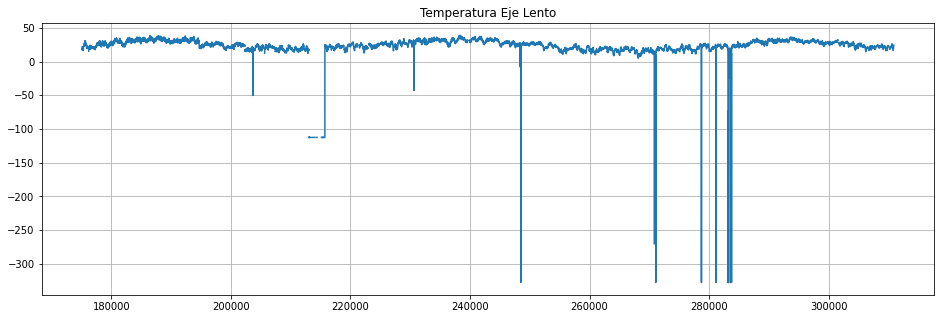

In [5]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Temperatura Eje Lento')
#plt.plot(df_raw['TempEjeLento_1'].rolling(window=150).median())
plt.plot(df_raw['TempEjeLento_1'])

In [6]:
train_dataset = df_raw[['date_time', 'TempEjeLento_1']].dropna()
train_dataset.columns = ["ds", "y"]
train_dataset.head()

,ds,y
175116,2016-05-01 02:00:00,21.9728
175117,2016-05-01 02:10:00,21.9186
175118,2016-05-01 02:20:00,21.7681
175119,2016-05-01 02:30:00,21.6371
175120,2016-05-01 02:40:00,21.5035


In [7]:
train_dataset = train_dataset[:100000]
print(train_dataset.head())
train_dataset.shape

                        ds        y
175116 2016-05-01 02:00:00  21.9728
175117 2016-05-01 02:10:00  21.9186
175118 2016-05-01 02:20:00  21.7681
175119 2016-05-01 02:30:00  21.6371
175120 2016-05-01 02:40:00  21.5035


(100000, 2)

In [8]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

In [9]:
train_dataset.head()

,ds,y
175116,2016-05-01 02:00:00,21.9728
175117,2016-05-01 02:10:00,21.9186
175118,2016-05-01 02:20:00,21.7681
175119,2016-05-01 02:30:00,21.6371
175120,2016-05-01 02:40:00,21.5035


In [10]:
future= prophet_basic.make_future_dataframe(periods=200)
future

,ds
0,2016-05-01 02:00:00
1,2016-05-01 02:10:00
2,2016-05-01 02:20:00
3,2016-05-01 02:30:00
4,2016-05-01 02:40:00
...,...
100183,2018-11-17 12:40:00
100184,2018-11-18 12:40:00
100185,2018-11-19 12:40:00
100186,2018-11-20 12:40:00


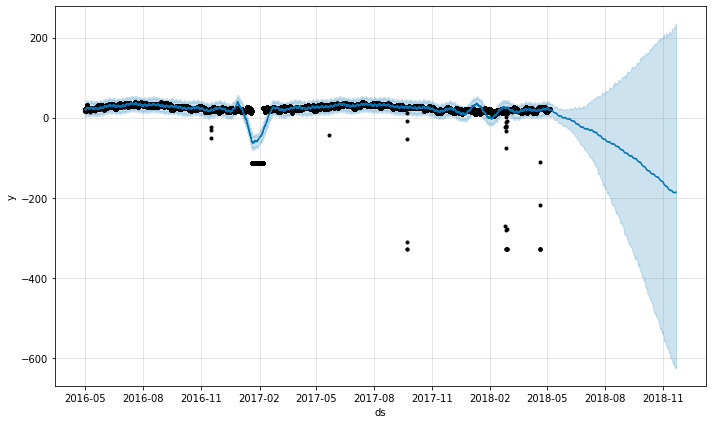

In [11]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

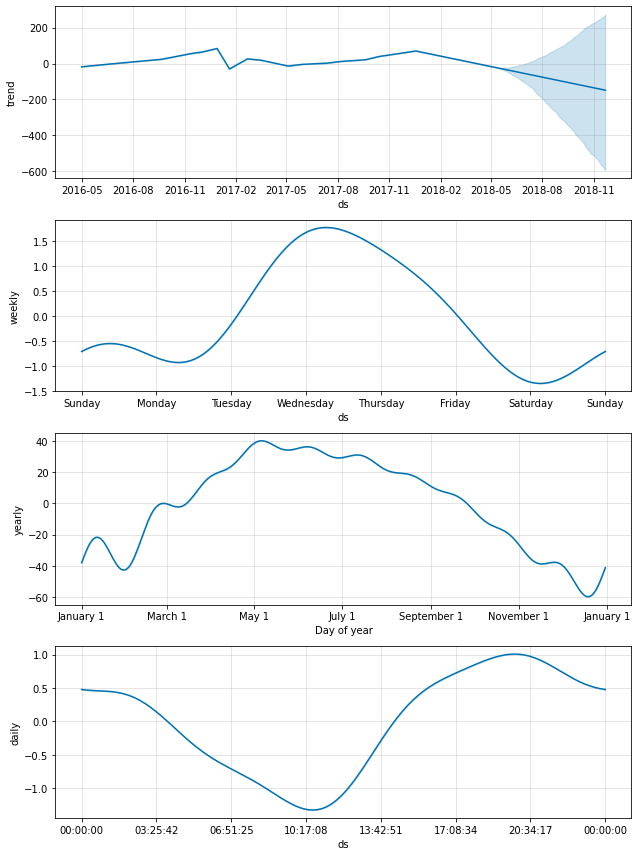

In [12]:
fig1 = prophet_basic.plot_components(forecast)

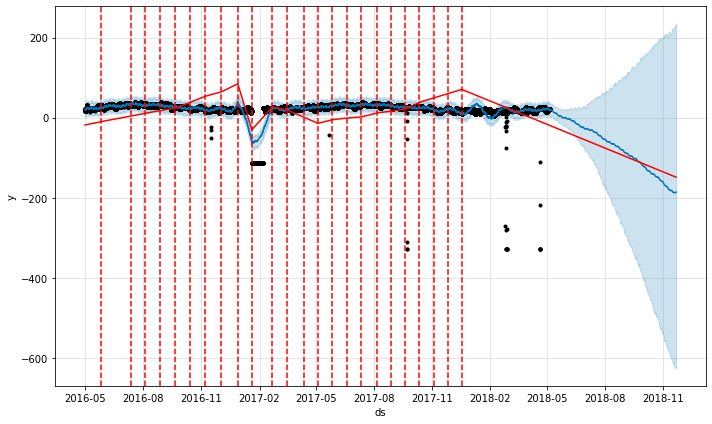

In [13]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)